# 통계적인 분석을 위한 라이브러리: statsmodels , scipy 












데이터를 가져와서 작업해 보아요!
---

[데이터를 가져오는 대표적인 방법]

-원하는 데이터가 담긴 엑셀 파일을 다운

**-금융 데이터 수집 라이브러리 이용(가격 정보)**

-웹크롤링

In [0]:
pip install -U finance-datareader #외부 라이브러리의 경우 설치를 해주어야 import 해 올 수 있다.

In [0]:
import FinanceDataReader as fdr #금융 데이터 수집 라이브러리
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

Capital Asset Pricing Model(CAPM)

개별자산수익률 <- 개별자산가격에서 수익률 계산 ->삼성전자


무위험자산수익률 <- 무위험자산의 대용치 가격을 찾고, 수익률 계산 ->KODEX 단기자금(ETF)


시장수익률 <- 시장의 대용치 가격을 찾고, 수익률계산->코스피지수



In [0]:
s1 = fdr.DataReader('005930','2019')
s1.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774


In [0]:
k1 = fdr.DataReader('KS11', '2019')
k1.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-02,2010.00,2050.55,2053.45,2004.27,326370000.0,-0.0152
2019-01-03,1993.70,2011.81,2014.72,1991.65,427980000.0,-0.0081
2019-01-04,2010.25,1992.40,2011.56,1984.53,408990000.0,0.0083
2019-01-07,2037.10,2034.24,2048.06,2030.90,440190000.0,0.0134
2019-01-08,2025.27,2038.68,2042.70,2023.59,397830000.0,-0.0058


In [0]:
r1 = fdr.DataReader('153130', '2019')
r1.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,100040,100050,100040,100045,87469,0.00010
2019-01-03,100070,100075,100070,100075,12636,0.00030
2019-01-04,100080,100085,100075,100085,19534,0.00010
2019-01-07,100085,100090,100085,100090,27897,0.00005
2019-01-08,100095,100095,100090,100090,25699,0.00000


In [0]:
market_riskpremium= k1['Change']-r1['Change']
stock_excessreturn = s1['Change']-r1['Change']

In [0]:
#회귀 분석
import statsmodels.api as sm

In [0]:
x = sm.add_constant(market_riskpremium) #상수항을 만들어주기 위해 add_constant() 사용
model = sm.OLS(stock_excessreturn, x).fit() #(y,x )형태


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Change   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     740.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.74e-83
Time:                        07:18:06   Log-Likelihood:                 984.03
No. Observations:                 306   AIC:                            -1964.
Df Residuals:                     304   BIC:                            -1957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.495      0.013       0.000       0.002
Change         1.0802      0.040     27.217      0.000       1.002       1.158
==============================================================================
Omnibus:                       10.651   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.991
Skew:                           0.353   Prob(JB):                      0.00249
Kurtosis:                       3.666   Cond. No.                         71.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#모델의 계수 보기

const = model.params[0] # 절편
beta = model.params[1] # 기울기

print("const=", const.round(4), "beta=", beta.round(4))

const= 0.0014 beta= 1.0802


In [0]:
import scipy.stats as stats
model2 = stats.linregress(market_riskpremium,stock_excessreturn)
print(model2)
print(model2.slope)
print(model2.intercept)

LinregressResult(slope=1.0801831470040777, intercept=0.0013904907684772075, rvalue=0.8420380124906691, pvalue=1.7362525658035257e-83, stderr=0.03968756890394623)
1.0801831470040777
0.0013904907684772075


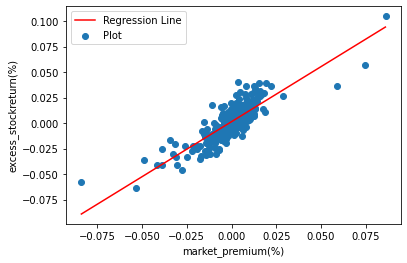

In [0]:
#산점도(scatter plot) + 회귀식(regression line) 시각화

x_line = np.linspace(k1['Change'].min(), k1['Change'].max(), 100) #회귀식을 그리기 위해 x값을 만들어요
# np.linspace(시작값, 끝값, num) -> 시작값과 끝값 사이 num개의 수를 일정한 간격으로 생성
y_line = x_line*beta + const

plt.scatter(market_riskpremium, stock_excessreturn)
plt.plot(x_line, y_line, color='red')
plt.xlabel('market_premium(%)')
plt.ylabel('excess_stockreturn(%)')
plt.legend(['Regression Line', 'Plot'])

# **데이터 시각화 라이브러리 matplotlib**








**<기본 틀>**

plt.title("제목 입력")

 *함수로 원하는 유형의 그래프 생성* 

plt.xlabel('x축 설명')

plt.ylabel('y축 설명')

plt.legend([a,b]) #범례 입력

plt.show()



---



**line plot 함수**

plt.plot(x, y)


---


**scatter plot 함수**

plt.scatter(x, y)


---


**bar chart 함수**

plt.bar(x, y)





In [0]:
import matplotlib.pyplot as plt

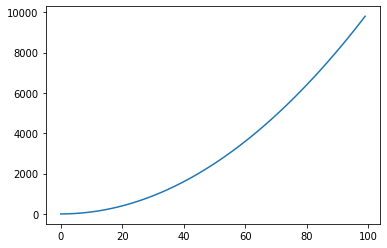

In [0]:
#line plot
#이차 함수
x = np.arange(0, 100, 1)
y = x*x
plt.plot(x, y)

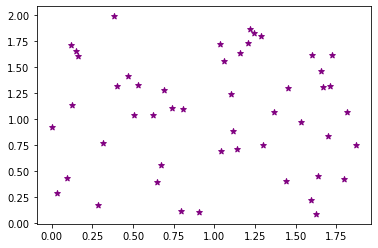

In [0]:
#마커 사용법 plot 함수 마지막에 색과 마커 모양 지정
import numpy as n
x = np.random.uniform(0,2,50)
y = np.random.uniform(0,2,50)
plt.scatter(x,y, color='purple', marker='*')


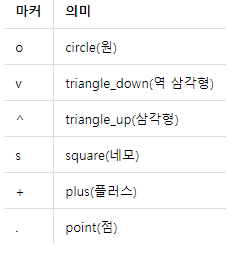

<BarContainer object of 50 artists>

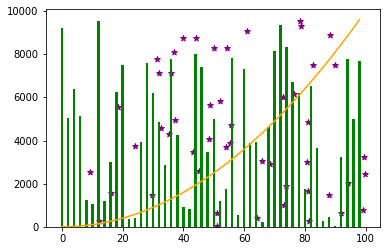

In [0]:
#중첩도 가능합니다
x = np.arange(0, 100, 2)
y = x*x
plt.plot(x, y,color='orange')
x1 = np.random.uniform(0,100,50)
y1 = np.random.uniform(0,y.max(),50)
plt.scatter(x1,y1, color='purple', marker='*')
x2 = np.arange(0, 100, 2)
y2 = np.random.uniform(y.min(),y.max(),len(x1)) # random한 수 추출
plt.bar(x2,y2, color='green')

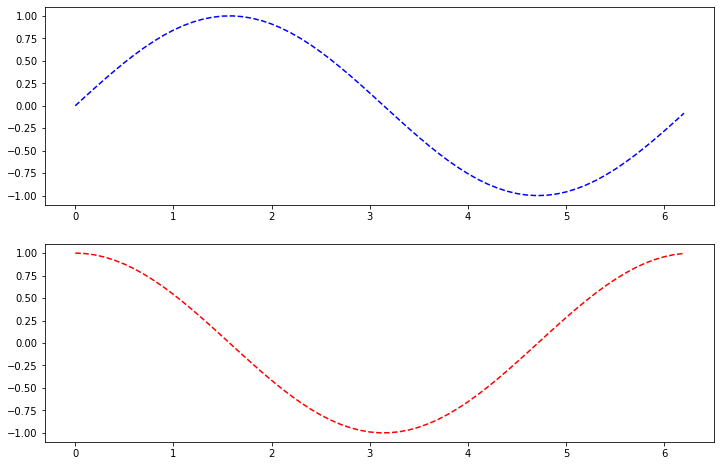

In [0]:
# n 개의 그래프 찍어내기-> Figure 객체 생성해야함!

x = np.arange(0.0, 2 * np.pi, 0.1)
sin_y = np.sin(x)
cos_y = np.cos(x)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(x, sin_y, 'b--')
ax2.plot(x, cos_y, 'r--')

plt.show()

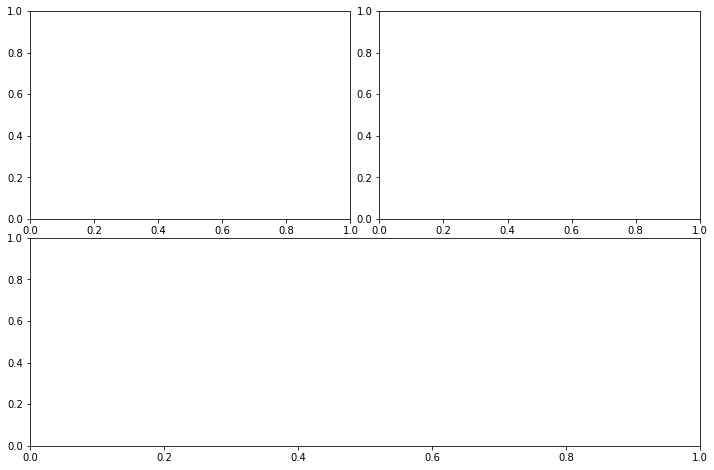

In [0]:
# 창의 크기를 다르게 하고 싶을 때
fig = plt.figure(figsize=(12, 8))
a1 = plt.subplot2grid((4,4), (0,0), rowspan=2, colspan=2)
a2 = plt.subplot2grid((4,4), (0,2), rowspan=2, colspan=2)
a3 = plt.subplot2grid((4,4), (2,0), rowspan=2, colspan=4)
plt.show()

데이터를 가져와서 작업해 보아요!
---

[데이터를 가져오는 대표적인 방법]

-원하는 데이터가 담긴 엑셀 파일을 다운

-금융 데이터 수집 라이브러리 이용(가격 정보)

**-웹크롤링**

In [0]:
#필요한 모듈, 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4

In [0]:
def price_naver(symbol, timeframe, count):
    
    #making url
    
    url_a = 'https://fchart.stock.naver.com/sise.nhn?requestType=0'
    url_insert =  url_a+'&symbol='+symbol+'&timeframe='+timeframe+'&count='+count

    #convert into bs(beautifulsoup) object
    
    price_raw = requests.get(url_insert)
    price_bs = bs4.BeautifulSoup(price_raw.text, 'lxml')
    price_list = price_bs.find_all('item')
    
    #empty sheets
    
    date_list = []
    open_list = []
    high_list = []
    low_list = []
    close_list = []
    volume_list = []
    
    #split the data into date/open/high/low/close/volume
    #close - 차트에서 끌어오기 때문에 수정종가로 자동반영
    
    for piece in price_list:
        temp = piece['data']
        dp = temp.split('|')
        
        date_list.append(dp[0])
        open_list.append(dp[1])
        high_list.append(dp[2])
        low_list.append(dp[3])
        close_list.append(dp[4])
        volume_list.append(dp[5])
    
    #dataframe으로 합치기
    
    dp_to_df = pd.DataFrame({'open': open_list, 'high': high_list, 'low': low_list, 'close': close_list, 'vol': volume_list}, index=date_list)
    dp_to_df = dp_to_df.astype(float)
    
    return dp_to_df

In [0]:
sk_raw = price_naver('000660', 'day', '1000')


In [0]:
type(sk_raw)

pandas.core.frame.DataFrame

In [0]:
sk_raw.head()

,open,high,low,close,vol
20160303,31550.0,32000.0,31100.0,31950.0,3898363.0
20160304,31800.0,32100.0,31550.0,31900.0,1913316.0
20160307,32150.0,32250.0,31500.0,31900.0,3487206.0
20160308,31200.0,31500.0,30300.0,30500.0,4616147.0
20160309,29900.0,30550.0,29650.0,30550.0,3503375.0


In [0]:
ma5 = pd.DataFrame(sk_raw['close'].rolling(window=5).mean())
ma20 = pd.DataFrame(sk_raw['close'].rolling(window=20).mean())
ma60 = pd.DataFrame(sk_raw['close'].rolling(window=60).mean())
ma120 = pd.DataFrame(sk_raw['close'].rolling(window=120).mean())
sk_raw['5일']=  ma5
sk_raw['20일']=  ma20
sk_raw['60일']=  ma60
sk_raw['120일']=  ma120

In [0]:
sk_ret = sk_raw.close.pct_change()[1:]

In [0]:
sk_raw['sk_ret']=sk_ret

In [0]:
sk_raw

,open,high,low,close,vol,5일,20일,60일,120일,sk_ret
20160303,31550.0,32000.0,31100.0,31950.0,3898363.0,NaN,NaN,NaN,NaN,NaN
20160304,31800.0,32100.0,31550.0,31900.0,1913316.0,NaN,NaN,NaN,NaN,-0.001565
20160307,32150.0,32250.0,31500.0,31900.0,3487206.0,NaN,NaN,NaN,NaN,0.000000
20160308,31200.0,31500.0,30300.0,30500.0,4616147.0,NaN,NaN,NaN,NaN,-0.043887
20160309,29900.0,30550.0,29650.0,30550.0,3503375.0,31360.0,NaN,NaN,NaN,0.001639
...,...,...,...,...,...,...,...,...,...,...
20200323,69700.0,71600.0,68000.0,69400.0,8192363.0,73340.0,85705.0,94250.000000,88518.333333,-0.072193
20200324,73000.0,78800.0,72100.0,78700.0,7247345.0,73000.0,84740.0,93998.333333,88495.833333,0.134006
20200325,82000.0,84700.0,79800.0,84500.0,8787217.0,75280.0,84235.0,93826.666667,88515.000000,0.073698
20200326,85000.0,87900.0,80400.0,80700.0,7895289.0,77620.0,83630.0,93571.666667,88504.166667,-0.044970


In [0]:
sk_raw=sk_raw.dropna() # 앞서 pandas에서 다룬 결측치 처리.dropna()!

In [0]:
sk_raw

,open,high,low,close,vol,5일,20일,60일,120일,sk_ret
20160824,35900.0,35950.0,35300.0,35750.0,1689924.0,35380.0,34455.0,32039.166667,30126.250000,0.004213
20160825,35100.0,35750.0,34900.0,35700.0,1568516.0,35690.0,34567.5,32155.833333,30157.500000,-0.001399
20160826,35850.0,36350.0,35750.0,36250.0,2635343.0,35860.0,34702.5,32285.000000,30193.750000,0.015406
20160829,35350.0,36400.0,35300.0,36250.0,2782441.0,35910.0,34795.0,32421.666667,30230.000000,0.000000
20160830,36800.0,36950.0,35550.0,36300.0,2766460.0,36050.0,34867.5,32566.666667,30278.333333,0.001379
...,...,...,...,...,...,...,...,...,...,...
20200323,69700.0,71600.0,68000.0,69400.0,8192363.0,73340.0,85705.0,94250.000000,88518.333333,-0.072193
20200324,73000.0,78800.0,72100.0,78700.0,7247345.0,73000.0,84740.0,93998.333333,88495.833333,0.134006
20200325,82000.0,84700.0,79800.0,84500.0,8787217.0,75280.0,84235.0,93826.666667,88515.000000,0.073698
20200326,85000.0,87900.0,80400.0,80700.0,7895289.0,77620.0,83630.0,93571.666667,88504.166667,-0.044970


NameError: ignored

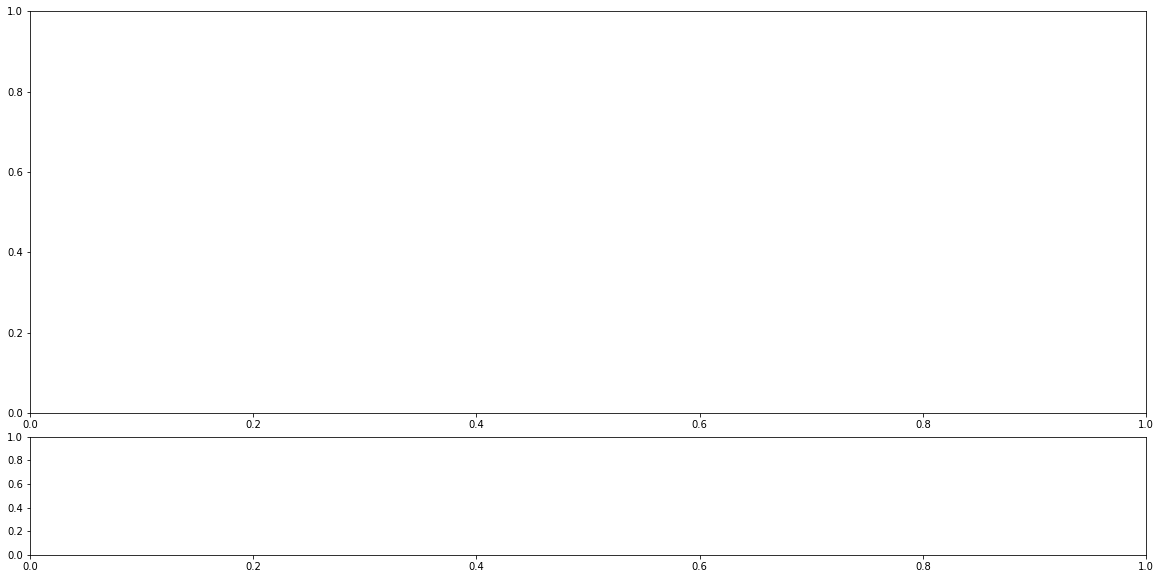

In [0]:
fig = plt.figure(figsize=(20, 10))
pr_line = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4,)
vol_bar = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
#이평선
pr_line.plot(sk_raw.index, sk_raw['5일'], label='MA5')
pr_line.plot(sk_raw.index, sk_raw['20일'], label='MA20')
pr_line.plot(sk_raw.index, sk_raw['60일'], label='MA60')
pr_line.plot(sk_raw.index, sk_raw['120일'], label='MA120',color='purple' )
#캔들
pr_line.bar( sk_raw.index, height=sk_raw['close']-sk_raw['open'], bottom=sk_raw['open'], width=1, color= list(map(lambda c: 'red' if c >0 else 'blue', sk_raw['sk_ret'])))
pr_line.vlines( sk_raw.index, sk_raw['low'], sk_raw['high'],  color= list(map(lambda c: 'red' if c >0 else 'blue', sk_raw['sk_ret'])))
#matplotlib.pyplot.vlines(x, ymin, ymax) vertical line을 그려주어요!

'''
-color에 들어간 함수의 의미: +인 날은 빨간색으로 -인 날은 파란색으로 표시하도록 하는 함수를 sk_raw['sk_ret']에 모두 적용하고 list로 반환
-lambda는 함수를 한 줄로 정의하여 바로 실행할 수 있게 해줍니다.
  형태
  lambda 인수 : 리턴값을 도출하는 방식을 정의
-map은 반복가능한 자료형을 입력으로 받아, 지정된 함수로 처리해서 반환합니다.
  형태
  map(함수,반복 가능한 자료형)

'''
vol_bar.bar(sk_raw.index,  sk_raw['vol'])
plt.show()



# 고생하셨습니다 :)